In [1]:
%matplotlib notebook

In [25]:
import re
import glob
import matplotlib.pyplot as plt

In [23]:
def read_castep_times(fname):
    with open(fname) as f:
        lines = f.readlines()
    
    calctime = None
    scftime = None
    for l in lines:
        if 'Calculation time' in l:
            calctime = float(l.split()[3])
        if '<-- SCF' in l:
            lspl = l.split()
            if len(lspl) == 7:
                scftime = float(l.split()[4])
    
    return scftime, calctime

In [46]:
ncRe = re.compile('farm-([0-9]+)')
cfiles = glob.glob('farm-*/initial_farm001.castep')
ncs = [int(ncRe.match(f).group(1)) for f in cfiles]
ncs, cfiles = zip(*sorted(zip(ncs, cfiles)))

ctimes = [read_castep_times(f) for f in cfiles]
nebtimes = [ct-st for (st, ct) in ctimes]

<IPython.core.display.Javascript object>


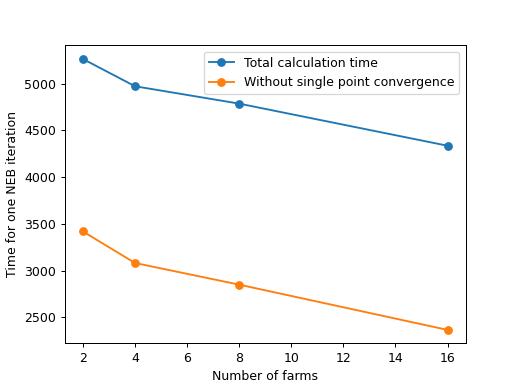

In [50]:
fig, ax = plt.subplots()

ax.set_xlabel('Number of farms')
ax.set_ylabel('Time for one NEB iteration')

ax.plot(ncs, [ct for (st, ct) in ctimes], 'o-', label='Total calculation time')
ax.plot(ncs, nebtimes, 'o-', label='Without single point convergence')

ax.legend()